In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [2]:
# Read data / csv files
a_file_path = './Correlation/regular_corr.csv'
b_file_path = './Correlation/rmv_out_corr.csv'
d_file_path = './Correlation/normali_corr.csv'

a_df = pd.read_csv(a_file_path)
b_df = pd.read_csv(b_file_path)
d_df = pd.read_csv(d_file_path)

In [3]:
# Train Test Split
a_X = a_df.drop('diabetes', axis=1)
a_y = a_df['diabetes']
b_X = b_df.drop('diabetes', axis=1)
b_y = b_df['diabetes']
d_X = d_df.drop('diabetes', axis=1)
d_y = d_df['diabetes']

a_X_train, a_X_test, a_y_train, a_y_test = train_test_split(a_X, a_y, test_size=0.2, random_state=1)
# a_X_train, a_X_validation, a_y_train, a_y_validation = train_test_split(a_X_train, a_y_train, test_size=0.25, random_state=1)
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(b_X, b_y, test_size=0.2, random_state=1)
# b_X_train, b_X_validation, b_y_train, b_y_validation = train_test_split(b_X_train, b_y_train, test_size=0.25, random_state=1)
d_X_train, d_X_test, d_y_train, d_y_test = train_test_split(d_X, d_y, test_size=0.2, random_state=1)
# d_X_train, d_X_validation, d_y_train, d_y_validation = train_test_split(d_X_train, d_y_train, test_size=0.25, random_state=1)

In [4]:
# Regular
a_model = XGBClassifier(random_state=1)
a_model.fit(a_X_train, a_y_train)

# Uncomment if you want to see the list of available hyperparameters
# parameter = a_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 5, 7], 'n_estimators': [100, 150, 200]}
a_grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5)
a_grid_search.fit(a_X_train, a_y_train)
a_best_params = a_grid_search.best_params_

print(f'Regular best param : {a_best_params}')

a_best_model = XGBClassifier(**a_best_params)
a_best_model.fit(a_X_train, a_y_train)
a_y_pred = a_best_model.predict(a_X_test)

print("Regular Classification Report:\n", classification_report(a_y_test, a_y_pred))
print("Regular Confusion Matrix:\n", confusion_matrix(a_y_test, a_y_pred))

Regular best param : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Regular Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2549
           1       0.96      0.74      0.83       844

    accuracy                           0.93      3393
   macro avg       0.94      0.86      0.89      3393
weighted avg       0.93      0.93      0.92      3393

Regular Confusion Matrix:
 [[2523   26]
 [ 222  622]]


In [5]:
a_accuracy = accuracy_score(a_y_test, a_y_pred)
print(a_accuracy)

0.9269083407014441


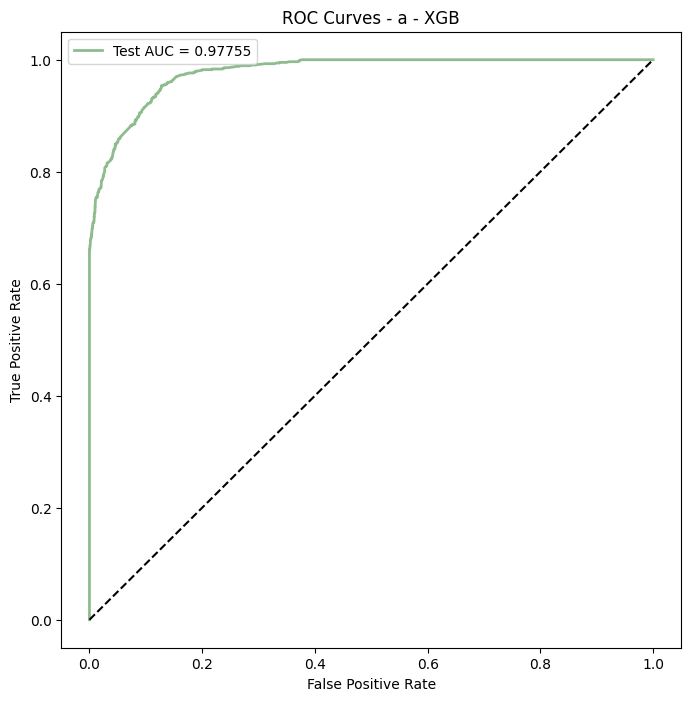

In [6]:
a_y_test_score = a_best_model.predict_proba(a_X_test)[:, 1]

# Compute ROC curve and AUC for each set
a_fpr_test, a_tpr_test, _ = roc_curve(a_y_test, a_y_test_score, drop_intermediate=False)
a_roc_auc_train = auc(a_fpr_test, a_tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 8))

plt.plot(a_fpr_test, a_tpr_test, color='darkseagreen', lw=2, label=f'Test AUC = {a_roc_auc_train:.5f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - a - XGB')
plt.legend()
plt.show()

In [7]:
# Regular
b_model = XGBClassifier(random_state=1)
b_model.fit(b_X_train, b_y_train)

# Uncomment if you want to see the list of available hyperparameters
# parameter = b_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 5, 7], 'n_estimators': [100, 150, 200]}
b_grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5)
b_grid_search.fit(b_X_train, b_y_train)
b_best_params = b_grid_search.best_params_

print(f'Remove Outlier best param : {b_best_params}')

b_best_model = XGBClassifier(**b_best_params)
b_best_model.fit(b_X_train, b_y_train)
b_y_pred = b_best_model.predict(b_X_test)

print("Remove Outlier Classification Report:\n", classification_report(b_y_test, b_y_pred))
print("Remove Outlier Confusion Matrix:\n", confusion_matrix(b_y_test, b_y_pred))

Remove Outlier best param : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Remove Outlier Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      2454
           1       0.83      0.51      0.63       374

    accuracy                           0.92      2828
   macro avg       0.88      0.75      0.80      2828
weighted avg       0.92      0.92      0.91      2828

Remove Outlier Confusion Matrix:
 [[2415   39]
 [ 182  192]]


In [8]:
b_accuracy = accuracy_score(b_y_test, b_y_pred)
print(b_accuracy)

0.9218528995756718


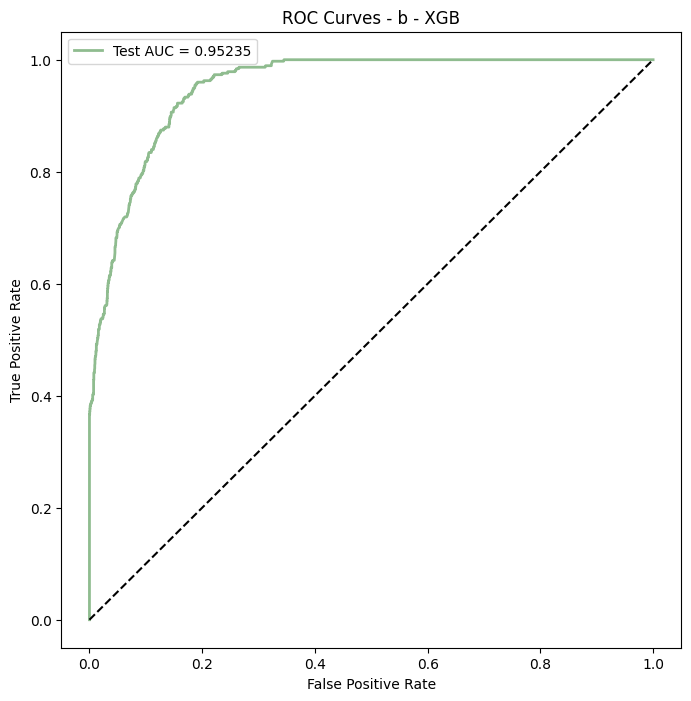

In [9]:
b_y_test_score = b_best_model.predict_proba(b_X_test)[:, 1]

# Compute ROC curve and AUC for each set
b_fpr_test, b_tpr_test, _ = roc_curve(b_y_test, b_y_test_score, drop_intermediate=False)
b_roc_auc_train = auc(b_fpr_test, b_tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 8))

plt.plot(b_fpr_test, b_tpr_test, color='darkseagreen', lw=2, label=f'Test AUC = {b_roc_auc_train:.5f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - b - XGB')
plt.legend()
plt.show()

In [10]:
# Regular
d_model = XGBClassifier(random_state=1)
d_model.fit(d_X_train, d_y_train)

# Uncomment if you want to see the list of available hyperparameters
# parameter = d_model.get_params()
# for key, value in parameter.items():
#     print(f"{key}: {value}")

param_grid = {'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 5, 7], 'n_estimators': [100, 150, 200]}
d_grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5)
d_grid_search.fit(d_X_train, d_y_train)
d_best_params = d_grid_search.best_params_

print(f'Normalization best param : {d_best_params}')

d_best_model = XGBClassifier(**d_best_params)
d_best_model.fit(d_X_train, d_y_train)
d_y_pred = d_best_model.predict(d_X_test)

print("Normalization Classification Report:\n", classification_report(d_y_test, d_y_pred))
print("Normalization Confusion Matrix:\n", confusion_matrix(d_y_test, d_y_pred))

Normalization best param : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Normalization Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      2454
           1       0.83      0.51      0.63       374

    accuracy                           0.92      2828
   macro avg       0.88      0.75      0.80      2828
weighted avg       0.92      0.92      0.91      2828

Normalization Confusion Matrix:
 [[2415   39]
 [ 182  192]]


In [11]:
d_accuracy = accuracy_score(d_y_test, d_y_pred)
print(d_accuracy)

0.9218528995756718


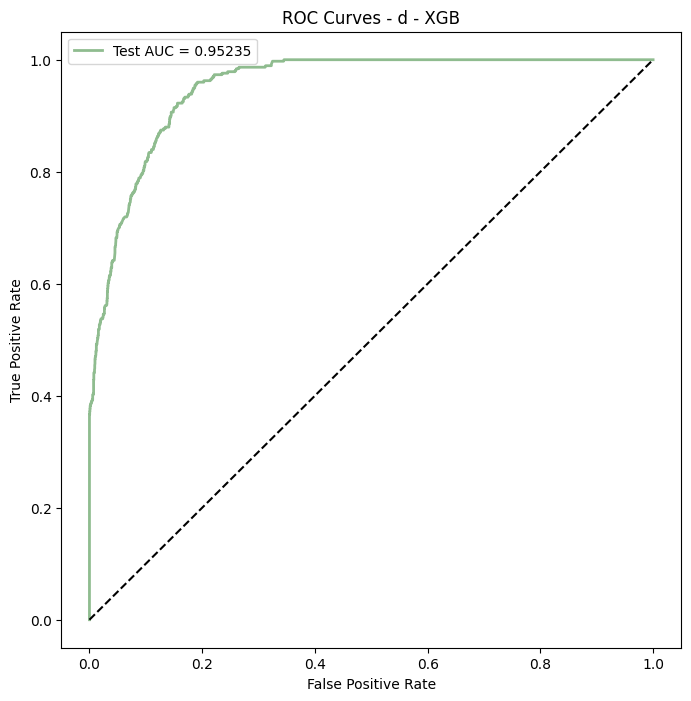

In [12]:
d_y_test_score = d_best_model.predict_proba(d_X_test)[:, 1]

# Compute ROC curve and AUC for each set
d_fpr_test, d_tpr_test, _ = roc_curve(d_y_test, d_y_test_score, drop_intermediate=False)
d_roc_auc_train = auc(d_fpr_test, d_tpr_test)

# Plot ROC curve
plt.figure(figsize=(8, 8))

plt.plot(d_fpr_test, d_tpr_test, color='darkseagreen', lw=2, label=f'Test AUC = {d_roc_auc_train:.5f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - d - XGB')
plt.legend()
plt.show()